# Matplotlib secondary x-axis with dates and days since start

There is more than one way to do it, but only on right way to do it.

You can use `twiny()` to get another Axes and set its x-axis manually.

You can also use `secondary_xaxis`, but then you need to provide the right conversion functions.

In [1]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

start_date = np.datetime64('2020-03-01', 'D')
days = np.arange(45)
dates = start_date + days

In [2]:
# Test data
a = 42
b = 0.03
ys = a*np.exp(b*days)

## Plot it Twice on Superimposed Axes sharing the Y-axis
This is a bit crude, but it is extremely simple.

We use stacked Axes (in Matplotlib, an Axis is the data graphing area itself)
each with its own x-axis.

Here, we need to manually keep the ticks on the x-axis for each Axis in sync.

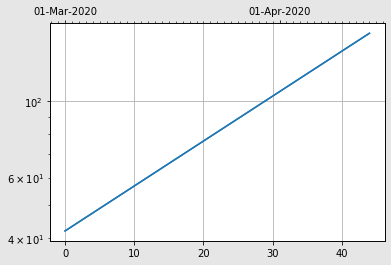

In [3]:
# Plot twice on two superimposed axes (graphing areas)

fig, ax = plt.subplots() 
fig.set_facecolor('0.9')
ax.plot(days, ys)
ax.set_yscale('log')
ax.grid(True)

ax2 = ax.twiny()
ax2.set_axisbelow(True)
xa2 = ax2.get_xaxis()
xa2.axis_date()
xa2.set_major_locator(mdates.MonthLocator())
xa2.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
xa2.set_minor_locator(mdates.DayLocator())
#xa2.set_minor_formatter(mdates.DateFormatter('%d'))
ax2.plot(dates, ys)

plt.show()

## Plotting on Two Axes with Date Auto-Formatting

This is still very crude. 
It is similar to the above, but we use the auto-formatting to have the date tick labels rotated.

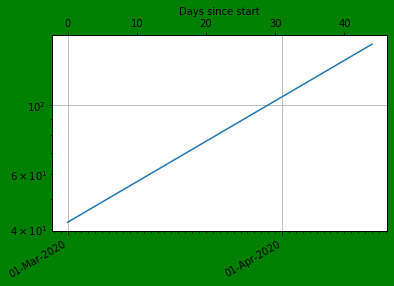

In [4]:
# Using two axes on top of each other, each with its own x-axis

fig, ax = plt.subplots() 
fig.set_facecolor('green')
ax.set_yscale('log')
ax.grid(True)
ax.plot(dates, ys)
ax.xaxis_date()

x1 = ax.get_xaxis()
x1.set_major_locator(mdates.MonthLocator())
x1.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
x1.set_minor_locator(mdates.DayLocator())
fig.autofmt_xdate()
x1.set_label('Date')

ax2 = ax.twiny()
ax2.set_xlabel('Days since start')
x2 = ax2.get_xaxis()
x2.set_major_locator(ticker.MultipleLocator(10))
ax2.plot(days, ys, alpha=0)  # invisible plot, but it sets the axis to match the other one

plt.show()

## Using `secondary_xaxis`
The best approach is to use `secondary_xaxis`. However, you need to 
provide conversion functions between the primary and secondary x coordinate representation so
it is a bit more cumbersome.

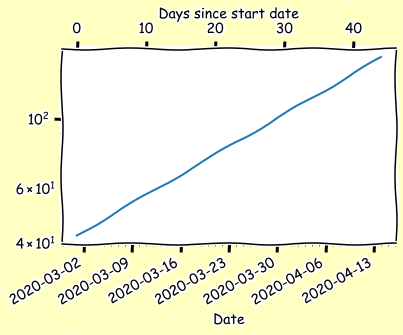

In [5]:
# Use secondary axis

# Conversion functions, se 
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/secondary_axis.html
#
def date_to_day(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(start_date)
    return y


def day_to_date(x):
    """
    return a matplotlib datenum (x is days since start date)
    """
    y = x + mdates.date2num(start_date)
    return y


# Use XKCD style for fun - you can remove the with statement if you like
with plt.xkcd(): 

    fig, ax = plt.subplots() 
    fig.set_facecolor('xkcd:cream')
    fig.autofmt_xdate()
    ax.set_yscale('log')
    ax.grid(True)
    ax.plot(dates, ys)
    ax.xaxis_date()
    ax.set_xlabel('Date')
    ax.get_xaxis().set_major_locator(mdates.WeekdayLocator(mdates.MONDAY))
    ax.get_xaxis().set_minor_locator(mdates.DayLocator())
    
    dage_x = ax.secondary_xaxis('top', functions=(date_to_day, day_to_date))
    dage_x.set_xlabel('Days since start date')
    
    plt.show()